In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("data/iwildcam_2022_results_v4.csv")
df = df.sort_values(by=["species", "Model", "threshold"], )

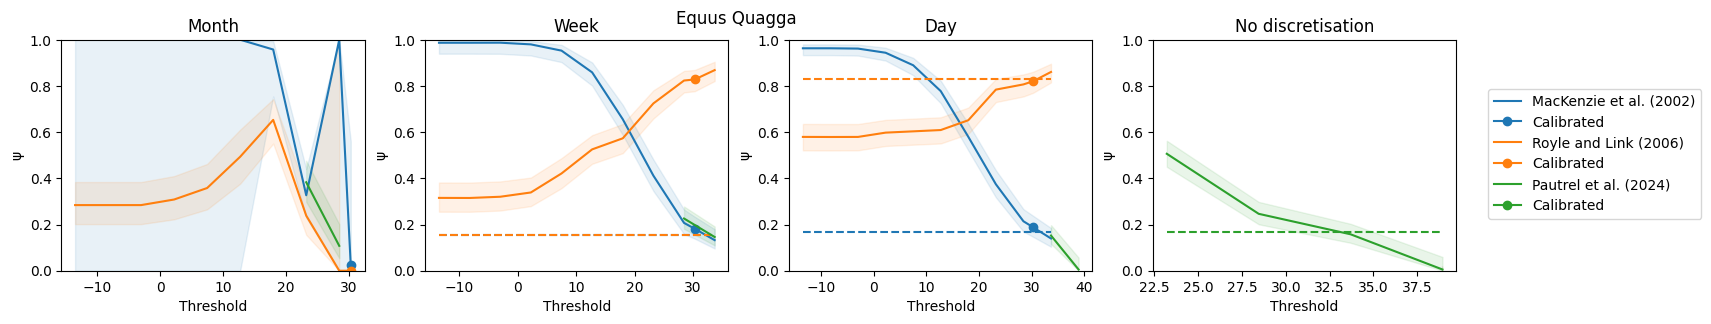

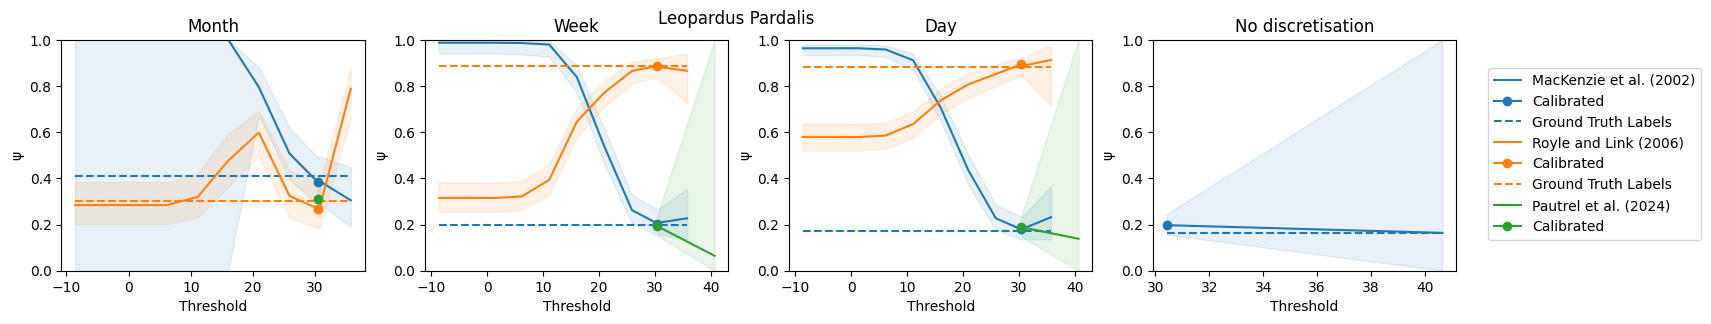

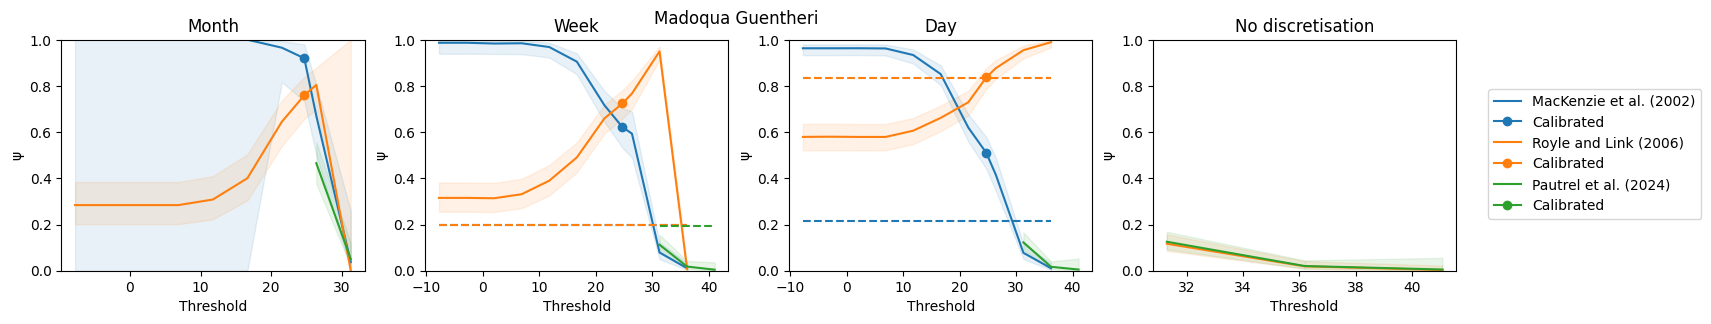

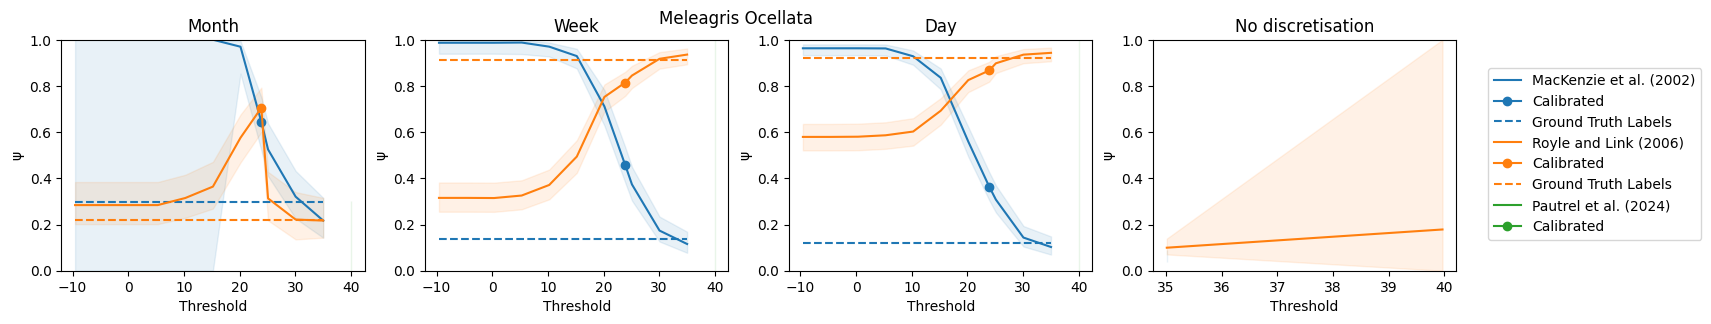

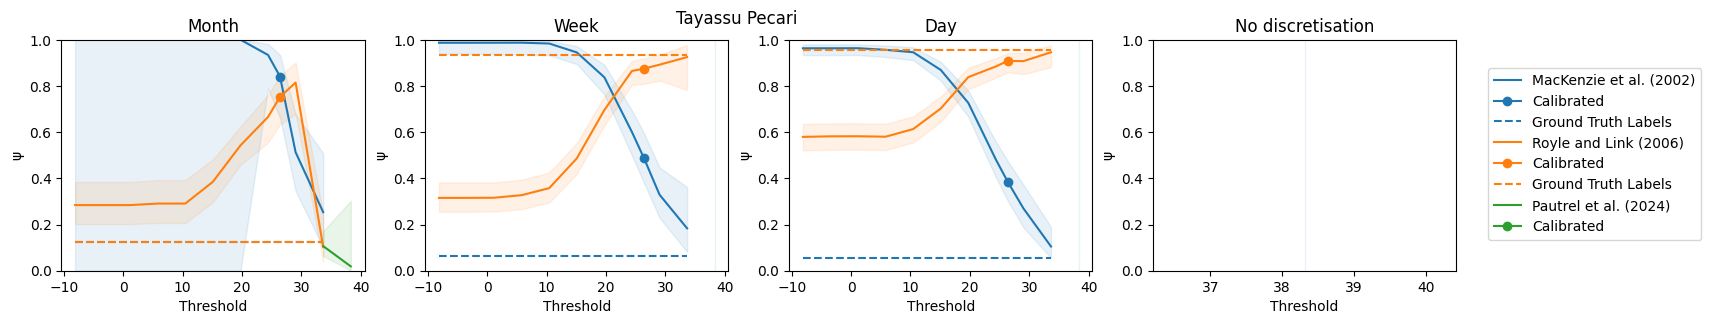

In [56]:
ci = 95
model_labels = {
    "BP": "MacKenzie et al. (2002)",
    "BP_FP": "Royle and Link (2006)",
    "COP": "Pautrel et al. (2024)",
}

for species in df["species"].unique():
    fig, axes = plt.subplots(1, df["Discretisation"].nunique(), figsize=(18, 3))
    for discretisation, ax in zip(df["Discretisation"].unique()[[1, 2, 3, 0]], axes):
        for model in df["Model"].unique():
            mask_sampled = (df["Model"] == model) & (df["species"] == species) & (df["Discretisation"] == discretisation)
            mask = mask_sampled & (df["threshold_type"] != "gt")
            if mask.sum() == 0:
                continue
            p = ax.plot(df[mask]["threshold"], df[mask]["psi_PointEstimate"], label=model_labels.get(model, model))
            ax.set_xlabel("Threshold")
            ax.set_ylabel("ψ")
            ax.fill_between(df[mask]["threshold"], df[mask][f"psi_CI{ci}lower"], df[mask][f"psi_CI{ci}upper"], color=p[0].get_color(), alpha=0.1)
            # if (mask & (df["threshold_type"] == "calibrated")).sum() == 1:
            ax.plot(df[mask & (df["threshold_type"] == "calibrated")]["threshold"], df[mask & (df["threshold_type"] == "calibrated")]["psi_PointEstimate"], color=p[0].get_color(), marker="o", label="Calibrated")
            p = ax.plot(df[mask]["threshold"], [df[mask_sampled & (df["threshold_type"] == "gt")]["psi_PointEstimate"]] * mask.sum(), color=p[0].get_color(), linestyle="dashed", label="Ground Truth Labels")
            ax.set_ylim(0, 1)
            ax.set_title(discretisation)
            # ax.legend()
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="center right", bbox_to_anchor=(0.04, 0, 1, 1), bbox_transform=fig.transFigure)
    fig.suptitle(species.title().replace("_", " "))